## Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prepareDF import PrepareDF
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# 1) Data Preperation
---

In [2]:
MovieData = PrepareDF()
MovieData.head()

,title,director,cast,rating,genres
0,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",7.0,"[Dramas, Independent Movies, International Mov..."
1,The Great British Baking Show,Andy Devonshire,"[Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...",8.6,"[British TV Shows, Reality TV]"
2,The Starling,Theodore Melfi,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",6.4,"[Comedies, Dramas]"
3,Je Suis Karl,Christian Schwochow,"[Luna Wedler, Jannis Niewöhner, Milan Peschel,...",5.5,"[Dramas, International Movies]"
4,Grown Ups,Dennis Dugan,"[Adam Sandler, Kevin James, Chris Rock, David ...",6.0,[Comedies]


## Formatting Predictors

Combine the genres listed for each movie into a single string, separating them with '|' characters

In [3]:
for ind, row in MovieData.iterrows():
    string = ''
    for genre in MovieData['genres'][ind]:
        string += genre+'|'
    MovieData['genres'][ind] = string[:-1]

Label Encoding and Encoding Categoical Variables as Intigers

In [4]:
labelEncoder = preprocessing.LabelEncoder()

# Encoding 'director' column as integers 
MovieData['director'] = labelEncoder.fit_transform(MovieData['director'].values)

#Using one-hot-encoding for 'genres' column (as many unique values)
MovieData = pd.get_dummies(MovieData, columns=['genres'])

# Since the cast has way too many poeple, we are going to select the 4 with the most screen time
MovieData['cast'] = MovieData['cast'].to_list()

# Creating new columns for individual cast
for i in range(4):
    MovieData[f'cast_{i+1}'] = ''

for ind, item in enumerate(MovieData['cast']):
    MovieData['cast']
    for index, cast_a in enumerate(item[:4]):
        MovieData[f'cast_{index+1}'][ind] = cast_a

MovieData.drop(columns=['cast'], inplace=True)

# Encoding cast columns
MovieData['cast_1'] = labelEncoder.fit_transform(MovieData['cast_1'].values)
MovieData['cast_2'] = labelEncoder.fit_transform(MovieData['cast_2'].values)
MovieData['cast_3'] = labelEncoder.fit_transform(MovieData['cast_3'].values)
MovieData['cast_4'] = labelEncoder.fit_transform(MovieData['cast_4'].values)

MovieData.head()

,title,director,rating,genres_Action & Adventure,genres_Action & Adventure|Anime Features|Children & Family Movies,genres_Action & Adventure|Anime Features|Classic Movies,genres_Action & Adventure|Anime Features|Horror Movies,genres_Action & Adventure|Anime Features|International Movies,genres_Action & Adventure|Anime Features|Sci-Fi & Fantasy,genres_Action & Adventure|Children & Family Movies,...,genres_TV Comedies,genres_TV Comedies|TV Dramas,genres_TV Dramas,genres_TV Horror|TV Mysteries|TV Thrillers,genres_TV Shows,genres_Thrillers,cast_1,cast_2,cast_3,cast_4
0,Sankofa,1224,7.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,1732,2515,128,2526
1,The Great British Baking Show,241,8.6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2095,3128,2204,2679
2,The Starling,3403,6.4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,2098,646,1850,3471
3,Je Suis Karl,654,5.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,1910,1416,2333,1002
4,Grown Ups,871,6.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,30,1799,661,856


# 2) MLP
---

## 2a) Derrived Data

### 2a.1) Getting Average Ratings by Predictors

In [5]:
# Calculate average ratings for director and cast
MovieData['director_avg_rating'] = MovieData.groupby('director')['rating'].transform('mean')
MovieData['cast_avg_rating'] = MovieData[['cast_1', 'cast_2', 'cast_3', 'cast_4']].mean(axis=1)

# Calculate average rating for genres
genre_columns = [col for col in MovieData.columns if 'genres_' in col]
MovieData['genre_avg_rating'] = MovieData[genre_columns].mean(axis=1)

### 2a.2) Getting interaction features

In [6]:
# Create interaction features
MovieData['director_cast_interaction'] = MovieData['director_avg_rating'] * MovieData['cast_avg_rating']
MovieData['director_genre_interaction'] = MovieData['director_avg_rating'] * MovieData['genre_avg_rating']
MovieData['cast_genre_interaction'] = MovieData['cast_avg_rating'] * MovieData['genre_avg_rating']

MovieData.head()

,title,director,rating,genres_Action & Adventure,genres_Action & Adventure|Anime Features|Children & Family Movies,genres_Action & Adventure|Anime Features|Classic Movies,genres_Action & Adventure|Anime Features|Horror Movies,genres_Action & Adventure|Anime Features|International Movies,genres_Action & Adventure|Anime Features|Sci-Fi & Fantasy,genres_Action & Adventure|Children & Family Movies,...,cast_1,cast_2,cast_3,cast_4,director_avg_rating,cast_avg_rating,genre_avg_rating,director_cast_interaction,director_genre_interaction,cast_genre_interaction
0,Sankofa,1224,7.0,False,False,False,False,False,False,False,...,1732,2515,128,2526,7.000,1725.25,0.003021,12076.7500,0.021148,5.212236
1,The Great British Baking Show,241,8.6,False,False,False,False,False,False,False,...,2095,3128,2204,2679,8.600,2526.50,0.003021,21727.9000,0.025982,7.632931
2,The Starling,3403,6.4,False,False,False,False,False,False,False,...,2098,646,1850,3471,6.400,2016.25,0.003021,12904.0000,0.019335,6.091390
3,Je Suis Karl,654,5.5,False,False,False,False,False,False,False,...,1910,1416,2333,1002,5.500,1665.25,0.003021,9158.8750,0.016616,5.030967
4,Grown Ups,871,6.0,False,False,False,False,False,False,False,...,30,1799,661,856,5.875,836.50,0.003021,4914.4375,0.017749,2.527190


## 2b) Train-Test Split

### 2b.1) Split

In [7]:
# Split the data into training and testing sets
X = MovieData.drop(columns=['title', 'rating', 'director', 'cast_1', 'cast_2', 'cast_3', 'cast_4'])
y = MovieData['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2b.2) Normalize

In [8]:
# Normalize numerical features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### 2c) Build and Train Model

In [9]:
# Build and train the neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_normalized.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_normalized, y_train, epochs=20, batch_size=32, validation_data=(X_test_normalized, y_test))

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 19.0576 - val_loss: 1.1249
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3808 - val_loss: 0.3430
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4523 - val_loss: 0.2737
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2780 - val_loss: 0.2673
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2525 - val_loss: 0.2574
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2324 - val_loss: 0.2570
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2169 - val_loss: 0.2353
Epoch 8/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2057 - val_loss: 0.2593
Epoch 9/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2285 - val_loss: 0.2473
Epoch 10/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2415 - val_loss: 0.2469
Epoch 11/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2352 - val_loss: 0.2546
Epoch 12/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

### 2c) Test-Set Prediction

In [10]:
# Predict ratings for the test set
y_pred = model.predict(X_test_normalized).flatten()

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step


### 2d) Performance Metrics

In [11]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 0.3186369609448218
Mean Squared Error: 0.24438505865629823
R-squared: 0.8236459966718517


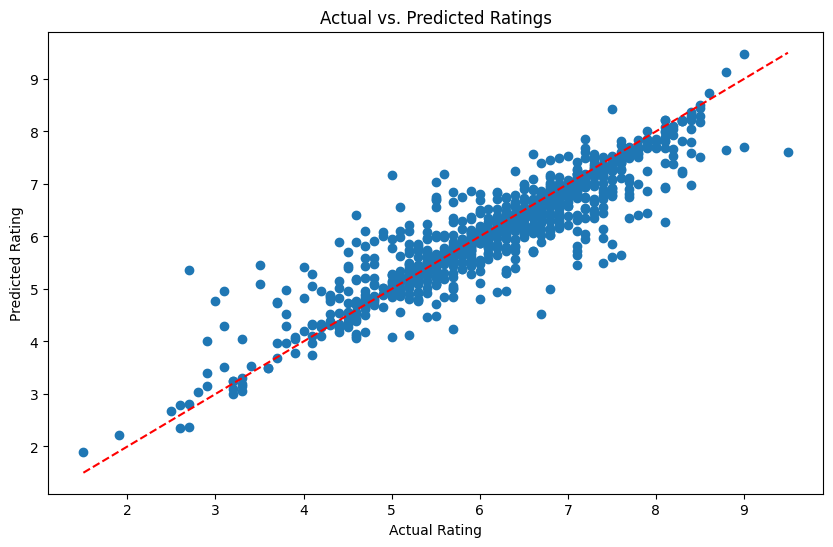

In [12]:
# Visualize the predicted ratings against the actual ratings

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()